In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, scale
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
wine = pd.read_csv('wine.csv')

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Ignoring Type as per problem statement

In [4]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [5]:
wine.drop(columns='Type',inplace=True)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
def column_boxplots(df,list_cols):
    for i in list_cols:    
        sns.boxplot(x=i, data = df)
        plt.show()

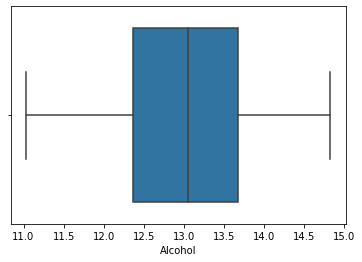

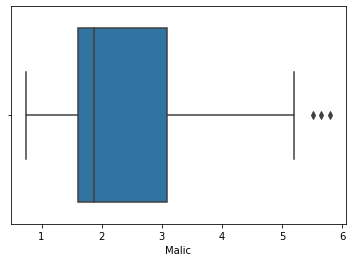

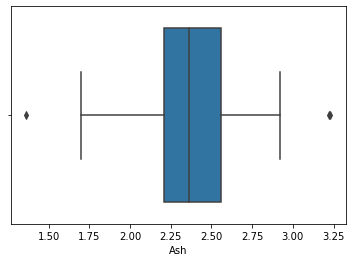

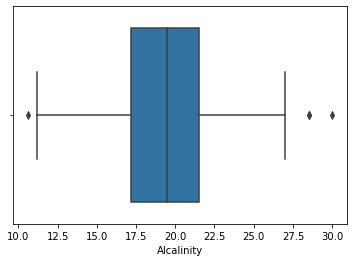

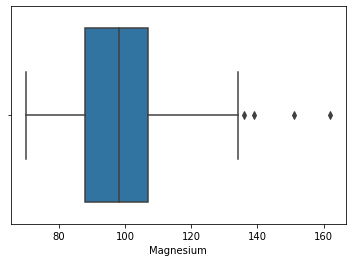

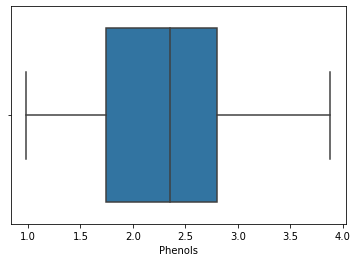

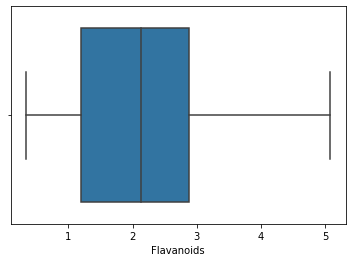

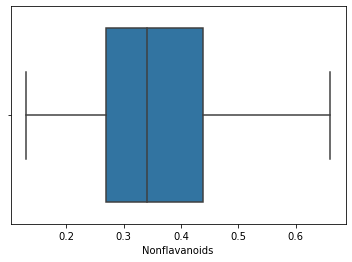

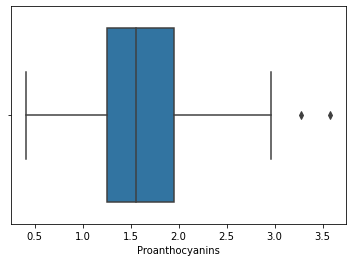

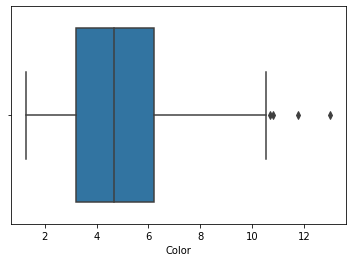

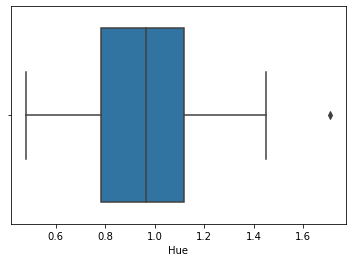

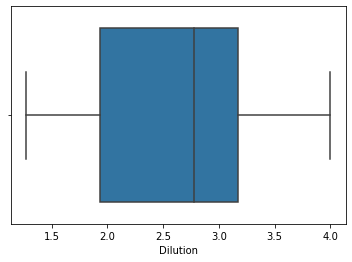

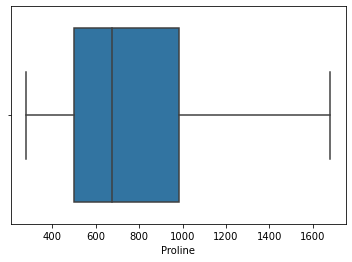

In [9]:
column_boxplots(wine,wine.columns)

Descriptive Analytics:<br>
Alcohol is bit left-skewed<br>
Malic is right-skewed and probably dragged due to the outliers<br>
Ash is left-skewed and has outliers on either sides<br>
Alcalinity has outliers on either sides<br>
Magnesium is right-skewed and probably dragged due to the outliers<br>
Phenols is right-skewed<br>
Flavanoids is right-skewed<br>
Nonflavanoids is right-skewed<br>
Proanthocyanins is bit right-skewed and probably dragged due to the outliers<br>
Color is right-skewed and probably dragged due to the outliers<br>
Hue has bit right-skewed and probably dragged due to the outliers<br>
Dilution is left-skewed<br>
Proline is right-skewed<br>

<AxesSubplot:>

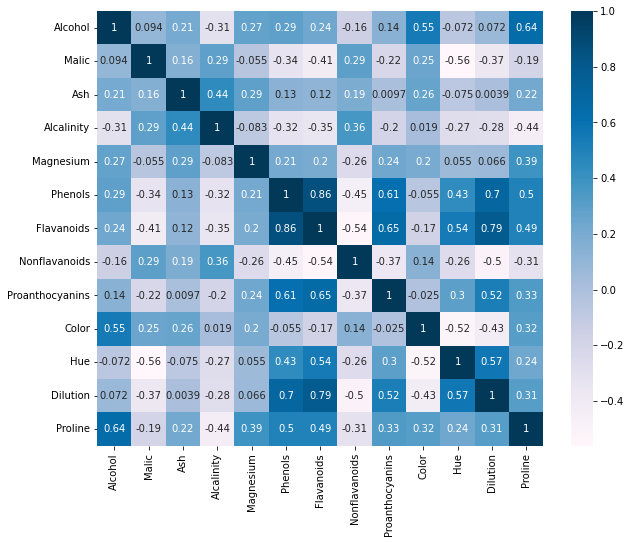

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(), annot=True, cmap='PuBu')

Since PCA depends on correlation among the dependent variables let's try to understand the behaviour of these variables via this heatmap

Alcohol has correlation with Proline, Color<br>
Phenols has correlation with Proline, Dilution, Proanthocyanins, Flavanoids<br>
Flavanoids has correlation with Proline, Dilution, Proanthocyanins, Hue<br>
Nonflavanoids has correlation with Dilution<br>
Proanthocyanins has correlation with Dilution<br>
Color has correlation with Hue<br>
Hue has correlation with Dilution<br>

In [11]:
ss = StandardScaler()

In [12]:
wine_scaled = pd.DataFrame(ss.fit_transform(wine),columns=wine.columns)

In [13]:
def outliers_to_median_values(df,column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate the median of the non-outlier data
    median = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)][column_name].median()

    # Replace outliers with the median
    df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median
    print('Distribution after outlier removal')
    sns.boxplot(x=column_name,data=df)
    plt.show()

In [14]:
outliers = ['Malic','Ash','Alcalinity','Magnesium', 'Proanthocyanins', 'Color', 'Hue']

Distribution after outlier removal


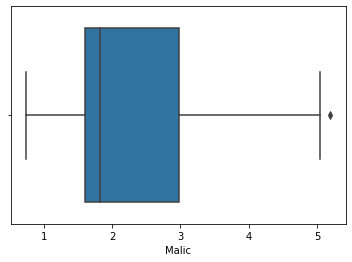

Distribution after outlier removal


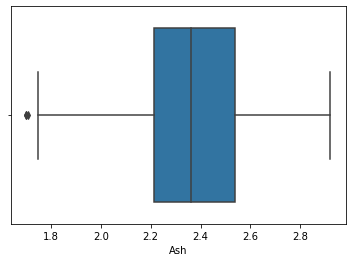

Distribution after outlier removal


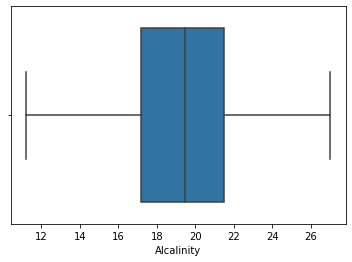

Distribution after outlier removal


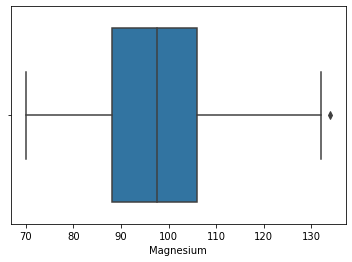

Distribution after outlier removal


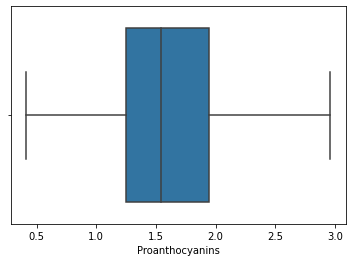

Distribution after outlier removal


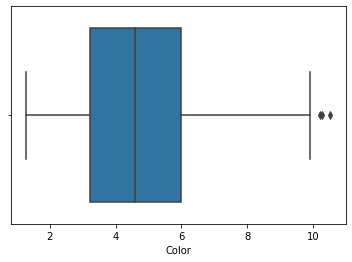

Distribution after outlier removal


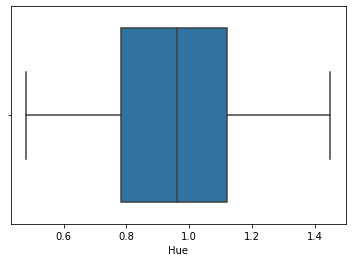

In [15]:
for i in outliers:
    outliers_to_median_values(wine,i)

## Hierarchical Approach

Tried different combinations of methods and metrics and ended up with ward-euclidean combination

In [16]:
ward_link = linkage(wine_scaled,method='ward',metric='euclidean')

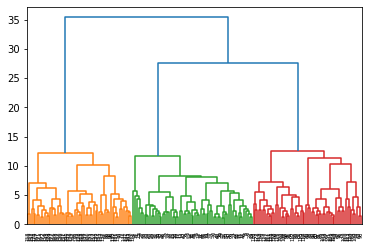

In [17]:
warddend = dendrogram(ward_link)

In [18]:
clusters = fcluster(ward_link,15,criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 3, 3, 2,
       2, 3, 1, 3, 1, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [19]:
wine_hier = wine.copy()

In [20]:
wine_hier['clusters'] = clusters

In [21]:
wine_hier.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [22]:
wine_hier.groupby('clusters').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusters,,,,,,,,,,,,,
1,13.061607,3.032679,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.353214,0.721000,1.727321,624.946429
2,13.669219,1.970000,2.436094,17.221875,105.507812,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875
3,12.203966,1.870517,2.232414,20.205172,89.853448,2.262931,2.088103,0.355345,1.621552,2.895345,1.047069,2.862241,501.431034


In [23]:
hier = silhouette_score(wine_scaled,clusters)

## K-Means

In [24]:
wine_scaled_km = np.array(wine_scaled)

In [25]:
wss = []
for i in range(2,5):
    KM = KMeans(n_clusters=i)
    KM.fit(wine_scaled_km)
    wss.append(KM.inertia_)

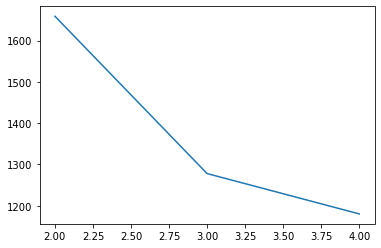

In [26]:
plt.plot(range(2,5), wss)

From the above wss/elbow plot and the inertia values, we can conculde that k=3 is the best

In [27]:
KM = KMeans(n_clusters=3)
KM.fit(wine_scaled_km)

KMeans(n_clusters=3)

In [28]:
labels = KM.labels_

In [29]:
wine_km = wine.copy()
wine_km['Clust_Kmeans'] = labels
wine_km.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust_Kmeans
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [30]:
kmeans = silhouette_score(wine_scaled_km,labels)

In [31]:
wine_km.groupby('Clust_Kmeans').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clust_Kmeans,,,,,,,,,,,,,
0,13.134118,3.160196,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,6.689020,0.691961,1.696667,619.058824
1,13.676774,1.997903,2.438387,17.146774,106.258065,2.847581,3.003226,0.292097,1.894113,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.836308,2.246615,20.060000,91.323077,2.247692,2.050000,0.357692,1.592846,2.973077,1.051169,2.803385,510.169231


We can see that the silhouette_score is not that good from the two approaches

Let's now try to perform PCA and then perform clustering 

## PCA

In [32]:
wine_array = wine.values

In [33]:
wine_normal = scale(wine)

In [34]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [35]:
pca_values.shape

(178, 13)

In [36]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(wine_normal)

In [37]:
var = pca.explained_variance_ratio_
var

array([0.37078074, 0.20328372, 0.09544499])

In [38]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([37.08, 57.41, 66.95])

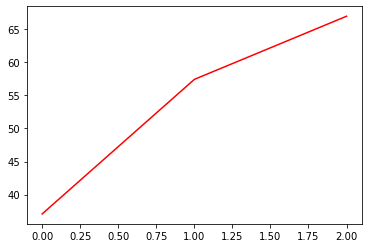

In [39]:
plt.plot(var1,color="red")

Let's create a dataframe with 3 principal components

In [40]:
pcaWinedf = pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])

In [41]:
pcaWinedf.head()

,pc1,pc2,pc3
0,3.459760,-1.658257,0.084477
1,2.367105,0.263035,-1.968049
2,2.587532,-1.013861,1.092347
3,3.884837,-2.796453,-0.042790
4,0.974618,-1.120196,2.417841


## PCA-Hierarchical

In [42]:
ward_link = linkage(pcaWinedf,method='ward',metric='euclidean')

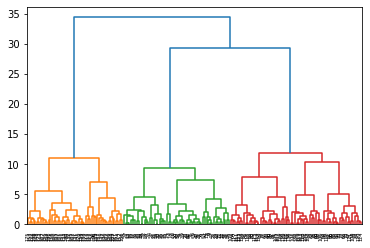

In [43]:
warddend = dendrogram(ward_link)

In [44]:
clusters = fcluster(ward_link,15,criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [45]:
wine_hier = pcaWinedf.copy()

In [46]:
wine_hier['clusters'] = clusters

In [47]:
wine_hier.groupby('clusters').mean()

,pc1,pc2,pc3
clusters,,,
1,-2.626471,-1.180919,0.045075
2,2.389042,-1.069934,-0.064047
3,-0.031790,1.731616,0.019312


In [48]:
pcaHier = silhouette_score(pcaWinedf,clusters)

## PCA - K-Means

In [49]:
wine_pca_km = np.array(pcaWinedf)

In [50]:
wss = []
for i in range(2,10):
    KM = KMeans(n_clusters=i)
    KM.fit(wine_pca_km)
    wss.append(KM.inertia_)

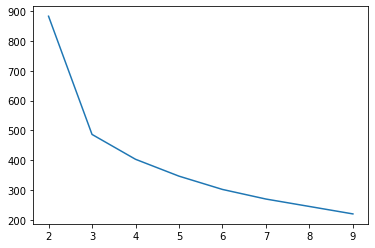

In [51]:
plt.plot(range(2,10), wss)

From the above wss/elbow plot and the inertia values, we can conculde that k=3 is the best

In [52]:
KM = KMeans(n_clusters=3)
KM.fit(wine_pca_km)

KMeans(n_clusters=3)

In [53]:
labels = KM.labels_

In [54]:
wine_pca_km_final = pcaWinedf.copy()
wine_pca_km_final['Clust_Kmeans'] = labels
wine_pca_km_final.head()

,pc1,pc2,pc3,Clust_Kmeans
0,3.459760,-1.658257,0.084477,2
1,2.367105,0.263035,-1.968049,2
2,2.587532,-1.013861,1.092347,2
3,3.884837,-2.796453,-0.042790,2
4,0.974618,-1.120196,2.417841,2


In [55]:
wine_pca_km_final.groupby('Clust_Kmeans').mean()

,pc1,pc2,pc3
Clust_Kmeans,,,
0,-0.106138,1.808495,0.183545
1,-2.694375,-1.184437,-0.251307
2,2.367512,-0.966465,0.011520


In [56]:
pcaKmeans = silhouette_score(pcaWinedf,labels)

In [57]:
comparison = pd.DataFrame()

In [58]:
values = [hier,kmeans,pcaHier,pcaKmeans]

In [59]:
Names = ['Hierarchical','KMeans','PCAHier','PCAKmeans']

In [60]:
comparison['Names'] = Names
comparison['Values'] = values

In [61]:
comparison

,Names,Values
0,Hierarchical,0.277444
1,KMeans,0.284859
2,PCAHier,0.428800
3,PCAKmeans,0.459026


As we can see that there is a significant improvement in silhouette scores of two approaches before and after performing PCA. But the drawback is profiling the clusters after performing PCA will be difficult as dimensions after performing PCA will have characterstics of all of the dependent variables and it is difficult to interpret the contribution of dependent variables.